In [2]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
#import datetime
import scipy.ndimage as ndimage
from matplotlib import cm
import matplotlib.dates as mdates
import geopy.distance
#import matplotlib as mpl

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import leafmap
import matplotlib.ticker as ticker
import plotly.express as px
from matplotlib.transforms import ScaledTranslation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#import pysplit

In [3]:
# Specify the path to your CSV file
file_path = "C:/Users/taiwoajayi/Downloads/statistics_250m_16_days_NDVI.csv"
file_path2 = "C:/Users/taiwoajayi/Downloads/statistics_Lai_500m.csv"
  # Replace with the actual file path"C:\Users\taiwoajayi\Downloads\statistics_Lai_500m.csv"
#C:\Users\taiwoajayi\Downloads\statistics_250m_16_days_NDVI.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)
df2
# Now, you can work with the DataFrame 'df' to analyze and manipulate your data


,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MCD15A2H,Lai_500m,A2002185,2002-07-04,0.9,6.6,750.3002,5.7,2.6052,1.7172,1.3104,289,288,99.65,2020079151206,2.9
1,MCD15A2H,Lai_500m,A2002193,2002-07-12,0.9,6.7,836.6997,5.8,2.9052,2.0295,1.4246,289,288,99.65,2020079154141,2.6
2,MCD15A2H,Lai_500m,A2002201,2002-07-20,0.9,6.9,676.4000,6.0,2.3568,1.6541,1.2861,289,287,99.31,2020079160001,2
3,MCD15A2H,Lai_500m,A2002209,2002-07-28,0.6,6.6,639.5004,6.0,2.2439,1.4237,1.1932,289,285,98.62,2020079163255,3
4,MCD15A2H,Lai_500m,A2002217,2002-08-05,0.9,6.8,743.6000,5.9,2.5730,1.7609,1.3270,289,289,100.00,2020079171418,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,MCD15A2H,Lai_500m,A2023225,2023-08-13,1.3,6.7,940.4000,5.4,3.2540,1.3921,1.1799,289,289,100.00,2023235025530,3.8
969,MCD15A2H,Lai_500m,A2023233,2023-08-21,1.2,6.8,902.9999,5.6,3.1246,1.7031,1.3050,289,289,100.00,2023242033918,2.9
970,MCD15A2H,Lai_500m,A2023241,2023-08-29,0.3,6.6,603.8002,6.3,2.1719,1.5361,1.2394,289,278,96.19,2023251173041,2.1
971,MCD15A2H,Lai_500m,A2023249,2023-09-06,1.2,6.6,875.1000,5.4,3.0280,1.3215,1.1496,289,289,100.00,2023258034244,3.4


In [4]:
df.columns = [i.strip() for i in df.columns]
df2.columns = [i.strip() for i in df2.columns]

In [5]:
df['dt'] = pd.to_datetime(df['dt'])
df2['dt'] = pd.to_datetime(df2['dt'])
df2

,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MCD15A2H,Lai_500m,A2002185,2002-07-04,0.9,6.6,750.3002,5.7,2.6052,1.7172,1.3104,289,288,99.65,2020079151206,2.9
1,MCD15A2H,Lai_500m,A2002193,2002-07-12,0.9,6.7,836.6997,5.8,2.9052,2.0295,1.4246,289,288,99.65,2020079154141,2.6
2,MCD15A2H,Lai_500m,A2002201,2002-07-20,0.9,6.9,676.4000,6.0,2.3568,1.6541,1.2861,289,287,99.31,2020079160001,2
3,MCD15A2H,Lai_500m,A2002209,2002-07-28,0.6,6.6,639.5004,6.0,2.2439,1.4237,1.1932,289,285,98.62,2020079163255,3
4,MCD15A2H,Lai_500m,A2002217,2002-08-05,0.9,6.8,743.6000,5.9,2.5730,1.7609,1.3270,289,289,100.00,2020079171418,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,MCD15A2H,Lai_500m,A2023225,2023-08-13,1.3,6.7,940.4000,5.4,3.2540,1.3921,1.1799,289,289,100.00,2023235025530,3.8
969,MCD15A2H,Lai_500m,A2023233,2023-08-21,1.2,6.8,902.9999,5.6,3.1246,1.7031,1.3050,289,289,100.00,2023242033918,2.9
970,MCD15A2H,Lai_500m,A2023241,2023-08-29,0.3,6.6,603.8002,6.3,2.1719,1.5361,1.2394,289,278,96.19,2023251173041,2.1
971,MCD15A2H,Lai_500m,A2023249,2023-09-06,1.2,6.6,875.1000,5.4,3.0280,1.3215,1.1496,289,289,100.00,2023258034244,3.4


In [6]:
list(df)

['product',
 'band',
 'modis_date',
 'dt',
 'value_min',
 'value_max',
 'value_sum',
 'value_range',
 'value_mean',
 'value_variance',
 'value_standard_deviation',
 'pixels_total',
 'pixels_pass_qa',
 'pixels_pass_qa_per_cent',
 'proc_date',
 'value_center']

Text(0.5, 1.0, 'EC2 Tifton Georgia')

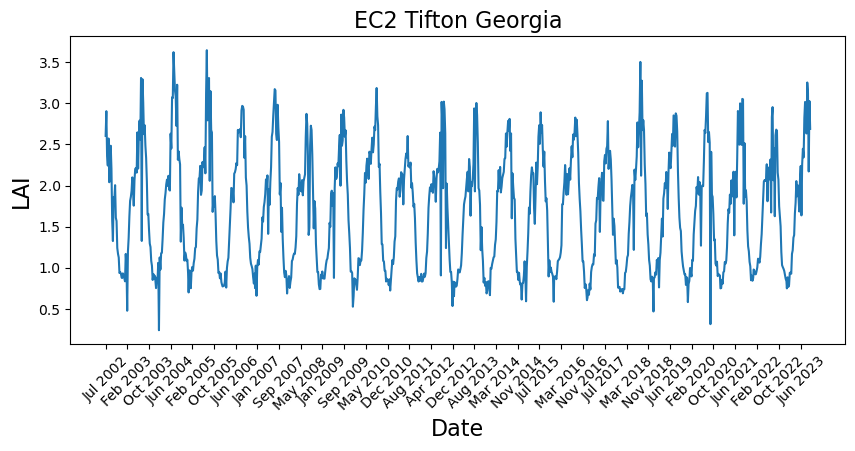

In [7]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df2['dt'], df2['value_mean'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df2['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('LAI', fontsize = 16)
ax.set_title('EC2 Tifton Georgia', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'EC2 Tifton Georgia')

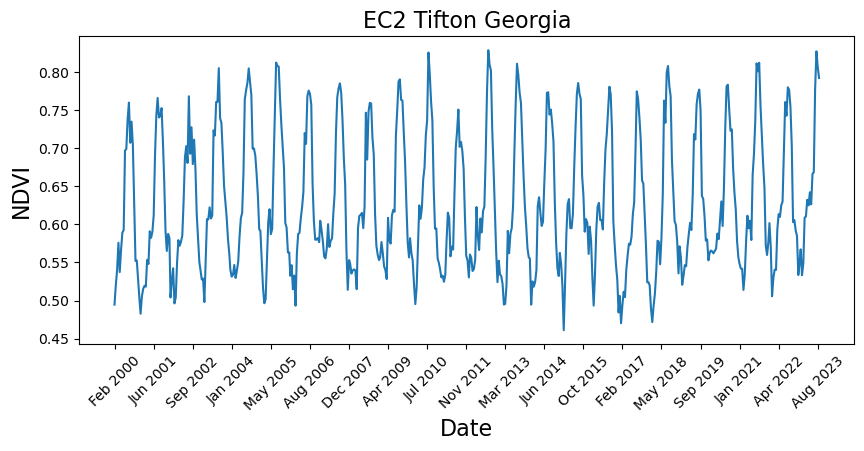

In [8]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df['dt'], df['value_mean'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('NDVI', fontsize = 16)
ax.set_title('EC2 Tifton Georgia', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

In [9]:
# Specify the path to your CSV file
file_path3 = "C:/Users/taiwoajayi/Downloads/statistics_250m_16_days_NDVI (1).csv"
file_path4 = "C:/Users/taiwoajayi/Downloads/statistics_Lai_500m (1).csv"
  # Replace with the actual file path"C:\Users\taiwoajayi\Downloads\statistics_Lai_500m.csv"
#C:\Users\taiwoajayi\Downloads\statistics_250m_16_days_NDVI.csv"
# Read the CSV file into a DataFrame
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)
df2
# Now, you can work with the DataFrame 'df' to analyze and manipulate your data


,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MCD15A2H,Lai_500m,A2002185,2002-07-04,0.9,6.6,750.3002,5.7,2.6052,1.7172,1.3104,289,288,99.65,2020079151206,2.9
1,MCD15A2H,Lai_500m,A2002193,2002-07-12,0.9,6.7,836.6997,5.8,2.9052,2.0295,1.4246,289,288,99.65,2020079154141,2.6
2,MCD15A2H,Lai_500m,A2002201,2002-07-20,0.9,6.9,676.4000,6.0,2.3568,1.6541,1.2861,289,287,99.31,2020079160001,2
3,MCD15A2H,Lai_500m,A2002209,2002-07-28,0.6,6.6,639.5004,6.0,2.2439,1.4237,1.1932,289,285,98.62,2020079163255,3
4,MCD15A2H,Lai_500m,A2002217,2002-08-05,0.9,6.8,743.6000,5.9,2.5730,1.7609,1.3270,289,289,100.00,2020079171418,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,MCD15A2H,Lai_500m,A2023225,2023-08-13,1.3,6.7,940.4000,5.4,3.2540,1.3921,1.1799,289,289,100.00,2023235025530,3.8
969,MCD15A2H,Lai_500m,A2023233,2023-08-21,1.2,6.8,902.9999,5.6,3.1246,1.7031,1.3050,289,289,100.00,2023242033918,2.9
970,MCD15A2H,Lai_500m,A2023241,2023-08-29,0.3,6.6,603.8002,6.3,2.1719,1.5361,1.2394,289,278,96.19,2023251173041,2.1
971,MCD15A2H,Lai_500m,A2023249,2023-09-06,1.2,6.6,875.1000,5.4,3.0280,1.3215,1.1496,289,289,100.00,2023258034244,3.4


In [10]:
df3.columns = [i.strip() for i in df3.columns]
df4.columns = [i.strip() for i in df4.columns]
df3['dt'] = pd.to_datetime(df3['dt'])
df4['dt'] = pd.to_datetime(df4['dt'])
df4

,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MCD15A2H,Lai_500m,A2002185,2002-07-04,0.2,1.2,9.8,1.0,0.4455,0.1107,0.3327,289,22,7.61,2020079150240,F
1,MCD15A2H,Lai_500m,A2002193,2002-07-12,0.1,0.8,8.0,0.7,0.3636,0.0487,0.2206,289,22,7.61,2020079154151,F
2,MCD15A2H,Lai_500m,A2002201,2002-07-20,0.1,1.4,10.9,1.3,0.4955,0.2004,0.4477,289,22,7.61,2020079160003,F
3,MCD15A2H,Lai_500m,A2002209,2002-07-28,0.1,0.8,8.5,0.7,0.3864,0.0621,0.2492,289,22,7.61,2020079163259,F
4,MCD15A2H,Lai_500m,A2002217,2002-08-05,0.2,1.2,10.6,1.0,0.4818,0.1224,0.3499,289,22,7.61,2020079165834,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,MCD15A2H,Lai_500m,A2023225,2023-08-13,0.2,0.9,8.0,0.7,0.3636,0.0514,0.2267,289,22,7.61,2023235021726,F
969,MCD15A2H,Lai_500m,A2023233,2023-08-21,0.2,1.0,9.6,0.8,0.4364,0.0850,0.2916,289,22,7.61,2023242034650,F
970,MCD15A2H,Lai_500m,A2023241,2023-08-29,0.2,1.1,9.6,0.9,0.4364,0.0923,0.3038,289,22,7.61,2023251173015,F
971,MCD15A2H,Lai_500m,A2023249,2023-09-06,0.2,1.0,9.3,0.8,0.4227,0.0790,0.2811,289,22,7.61,2023258034242,F


Text(0.5, 1.0, 'Tucson Arizona')

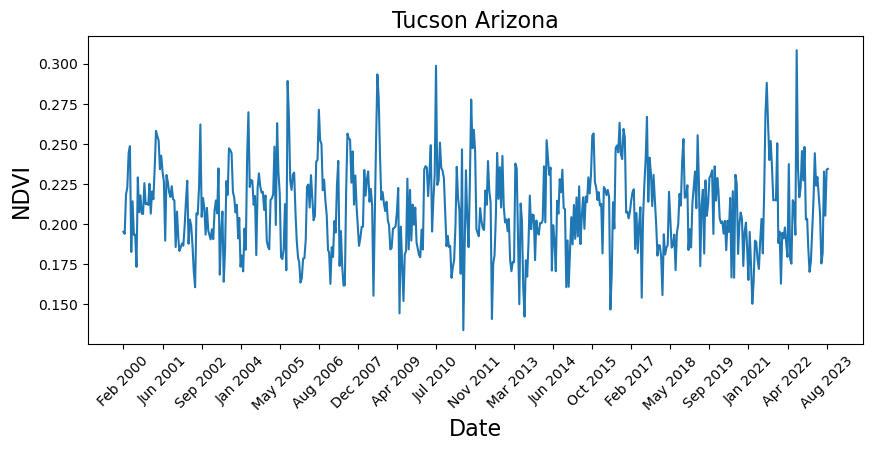

In [11]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df3['dt'], df3['value_mean'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df3['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('NDVI', fontsize = 16)
ax.set_title('Tucson Arizona', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'Tucson Arizona')

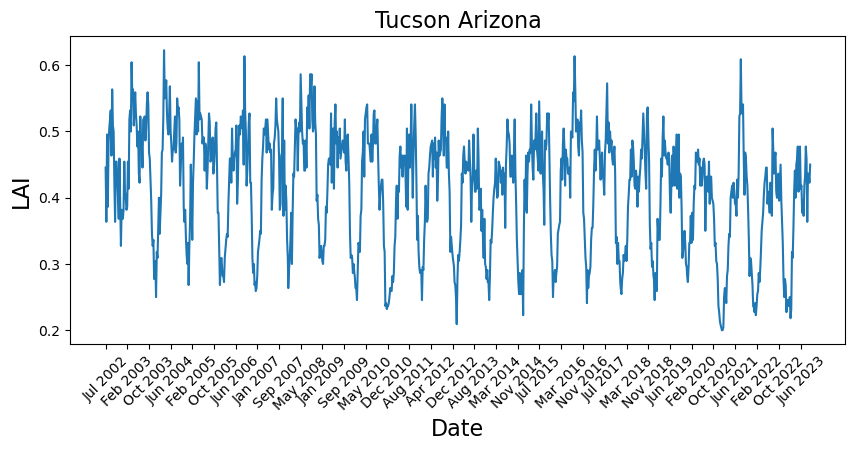

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df4['dt'], df4['value_mean'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df4['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('LAI', fontsize = 16)
ax.set_title('Tucson Arizona', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

In [13]:
# Specify the path to your CSV file
file_path5 = "C:/Users/taiwoajayi/Downloads/statistics_LST_Day_1km.csv"
file_path6 = "C:/Users/taiwoajayi/Downloads/statistics_LST_Day_1km (1).csv"
  # Replace with the actual file path"C:\Users\taiwoajayi\Downloads\statistics_Lai_500m.csv"
#C:\Users\taiwoajayi\Downloads\statistics_250m_16_days_NDVI.csv"
# Read the CSV file into a DataFrame
df5 = pd.read_csv(file_path5)
df6 = pd.read_csv(file_path6)
df6
# Now, you can work with the DataFrame 'df' to analyze and manipulate your data


,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MOD11A2,LST_Day_1km,A2000049,2000-02-18,296.72,300.80,24147.7656,4.08,298.1206,0.7814,0.8840,81,81,100.0,2020048120509,297.72
1,MOD11A2,LST_Day_1km,A2000057,2000-02-26,294.26,297.14,23964.5449,2.88,295.8586,0.5981,0.7734,81,81,100.0,2020045130203,296.4
2,MOD11A2,LST_Day_1km,A2000065,2000-03-05,293.76,297.26,23986.4395,3.50,296.1289,0.7050,0.8397,81,81,100.0,2020045130335,296.54
3,MOD11A2,LST_Day_1km,A2000073,2000-03-13,293.66,296.02,23903.8613,2.36,295.1094,0.3143,0.5606,81,81,100.0,2020045130523,295.28
4,MOD11A2,LST_Day_1km,A2000081,2000-03-21,295.10,297.62,23984.6797,2.52,296.1071,0.2239,0.4732,81,81,100.0,2020045130703,296.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,MOD11A2,LST_Day_1km,A2023225,2023-08-13,303.28,305.50,24641.3770,2.22,304.2145,0.2599,0.5098,81,81,100.0,2023235044712,303.98
1078,MOD11A2,LST_Day_1km,A2023233,2023-08-21,302.62,307.22,24647.5391,4.60,304.2906,0.9540,0.9767,81,81,100.0,2023242040346,303.58
1079,MOD11A2,LST_Day_1km,A2023241,2023-08-29,297.50,301.16,24281.3809,3.66,299.7701,0.5460,0.7389,81,81,100.0,2023251223543,298.88
1080,MOD11A2,LST_Day_1km,A2023249,2023-09-06,301.20,303.20,24480.9043,2.00,302.2334,0.1698,0.4120,81,81,100.0,2023258041032,302.08


In [14]:
df5.columns = [i.strip() for i in df5.columns]
df6.columns = [i.strip() for i in df6.columns]
df5['dt'] = pd.to_datetime(df5['dt'])
df6['dt'] = pd.to_datetime(df6['dt'])
df6

,product,band,modis_date,dt,value_min,value_max,value_sum,value_range,value_mean,value_variance,value_standard_deviation,pixels_total,pixels_pass_qa,pixels_pass_qa_per_cent,proc_date,value_center
0,MOD11A2,LST_Day_1km,A2000049,2000-02-18,296.72,300.80,24147.7656,4.08,298.1206,0.7814,0.8840,81,81,100.0,2020048120509,297.72
1,MOD11A2,LST_Day_1km,A2000057,2000-02-26,294.26,297.14,23964.5449,2.88,295.8586,0.5981,0.7734,81,81,100.0,2020045130203,296.4
2,MOD11A2,LST_Day_1km,A2000065,2000-03-05,293.76,297.26,23986.4395,3.50,296.1289,0.7050,0.8397,81,81,100.0,2020045130335,296.54
3,MOD11A2,LST_Day_1km,A2000073,2000-03-13,293.66,296.02,23903.8613,2.36,295.1094,0.3143,0.5606,81,81,100.0,2020045130523,295.28
4,MOD11A2,LST_Day_1km,A2000081,2000-03-21,295.10,297.62,23984.6797,2.52,296.1071,0.2239,0.4732,81,81,100.0,2020045130703,296.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,MOD11A2,LST_Day_1km,A2023225,2023-08-13,303.28,305.50,24641.3770,2.22,304.2145,0.2599,0.5098,81,81,100.0,2023235044712,303.98
1078,MOD11A2,LST_Day_1km,A2023233,2023-08-21,302.62,307.22,24647.5391,4.60,304.2906,0.9540,0.9767,81,81,100.0,2023242040346,303.58
1079,MOD11A2,LST_Day_1km,A2023241,2023-08-29,297.50,301.16,24281.3809,3.66,299.7701,0.5460,0.7389,81,81,100.0,2023251223543,298.88
1080,MOD11A2,LST_Day_1km,A2023249,2023-09-06,301.20,303.20,24480.9043,2.00,302.2334,0.1698,0.4120,81,81,100.0,2023258041032,302.08


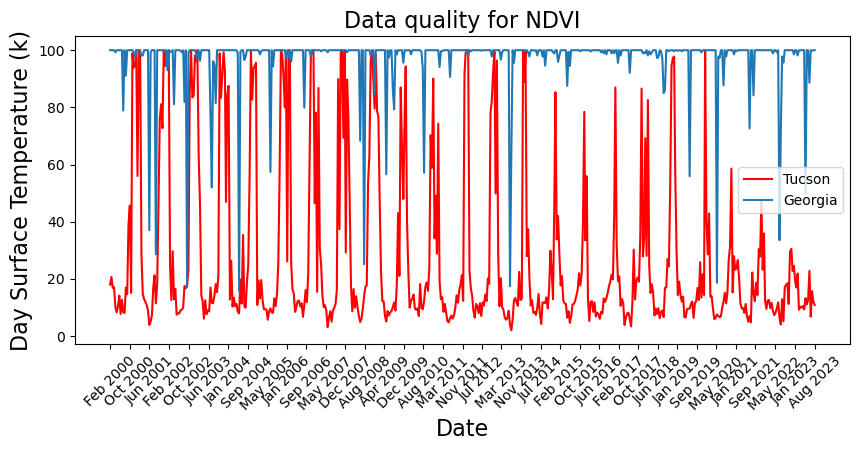

In [30]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df3['dt'], df3['pixels_pass_qa_per_cent'], color = 'r', label = 'Tucson')
plt.plot(df['dt'], df['pixels_pass_qa_per_cent'], label = 'Georgia')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df5['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Day Surface Temperature (k)', fontsize = 16)
ax.set_title('Data quality for NDVI', fontsize = 16)
ax.legend()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

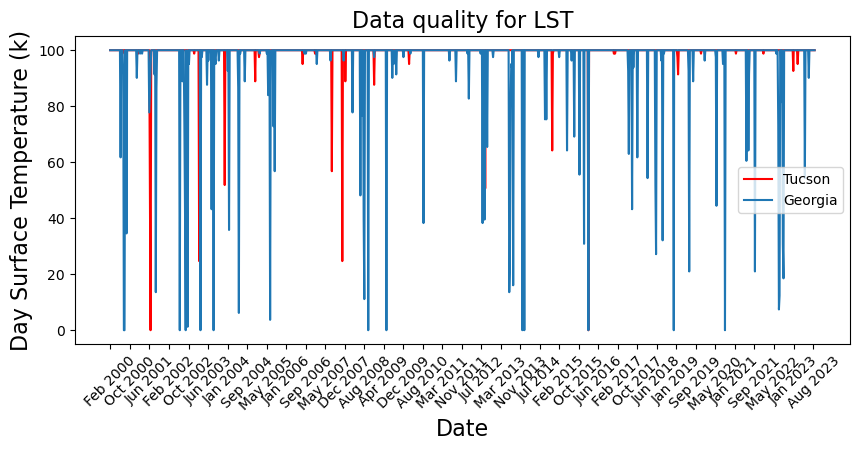

In [25]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df5['dt'], df5['pixels_pass_qa_per_cent'], color = 'r', label = 'Tucson')
plt.plot(df6['dt'], df6['pixels_pass_qa_per_cent'], label = 'Georgia')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df5['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Day Surface Temperature (k)', fontsize = 16)
ax.set_title('Data quality for LST', fontsize = 16)
ax.legend()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

In [20]:
# Filter the data using the condition >= 0.4
filtered_data = df6[df6['value_mean'] >= 250]
filtered_data
filtered_data2 = df5[df5['value_mean'] >= 250]

# Print the filtered data


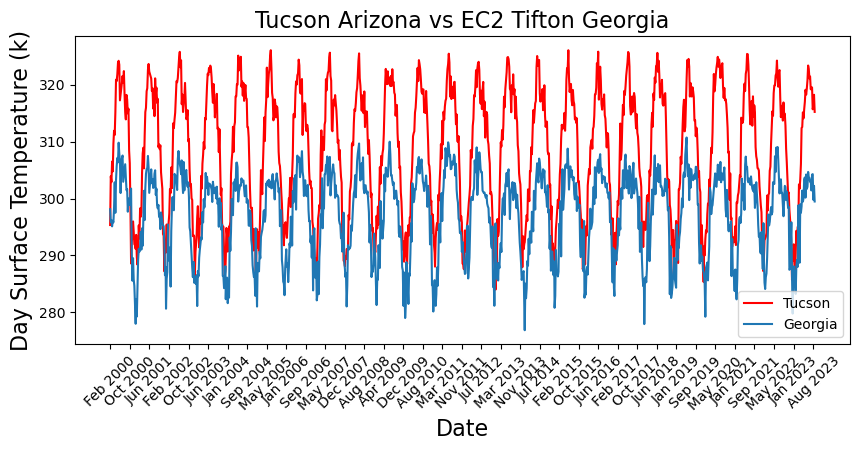

In [22]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(filtered_data2['dt'], filtered_data2['value_mean'], color = 'r', label = 'Tucson')
plt.plot(filtered_data['dt'], filtered_data['value_mean'], label = 'Georgia')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df5['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Day Surface Temperature (k)', fontsize = 16)
ax.set_title('Tucson Arizona vs EC2 Tifton Georgia', fontsize = 16)
ax.legend()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

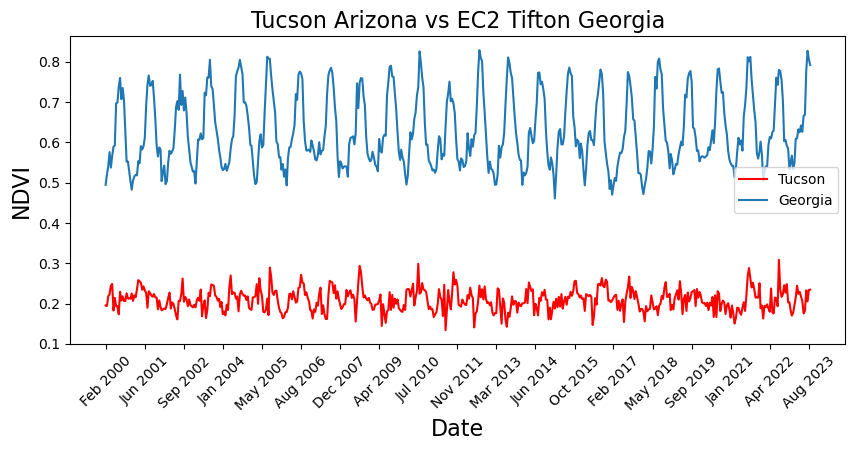

In [17]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df3['dt'], df3['value_mean'], color = 'r', label = 'Tucson')
plt.plot(df['dt'], df['value_mean'], label = 'Georgia')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df3['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('NDVI', fontsize = 16)
ax.set_title('Tucson Arizona vs EC2 Tifton Georgia', fontsize = 16)
ax.legend()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

Text(0.5, 1.0, 'Tucson Arizona vs EC2 Tifton Georgia')

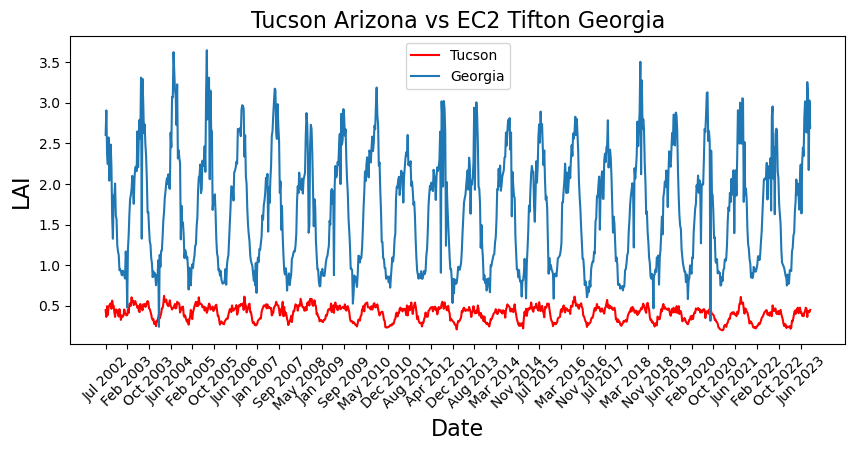

In [18]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(df4['dt'], df4['value_mean'], color = 'red', label = 'Tucson')
plt.plot(df2['dt'], df2['value_mean'], label = 'Georgia')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45) 
n = 30  # Show every 30th label (adjust this as needed)
plt.xticks(df4['dt'][::n])
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('LAI', fontsize = 16)
ax.legend()
ax.set_title('Tucson Arizona vs EC2 Tifton Georgia', fontsize = 16)
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#ax.xaxis.set_minor_locator(ticker.NullLocator())

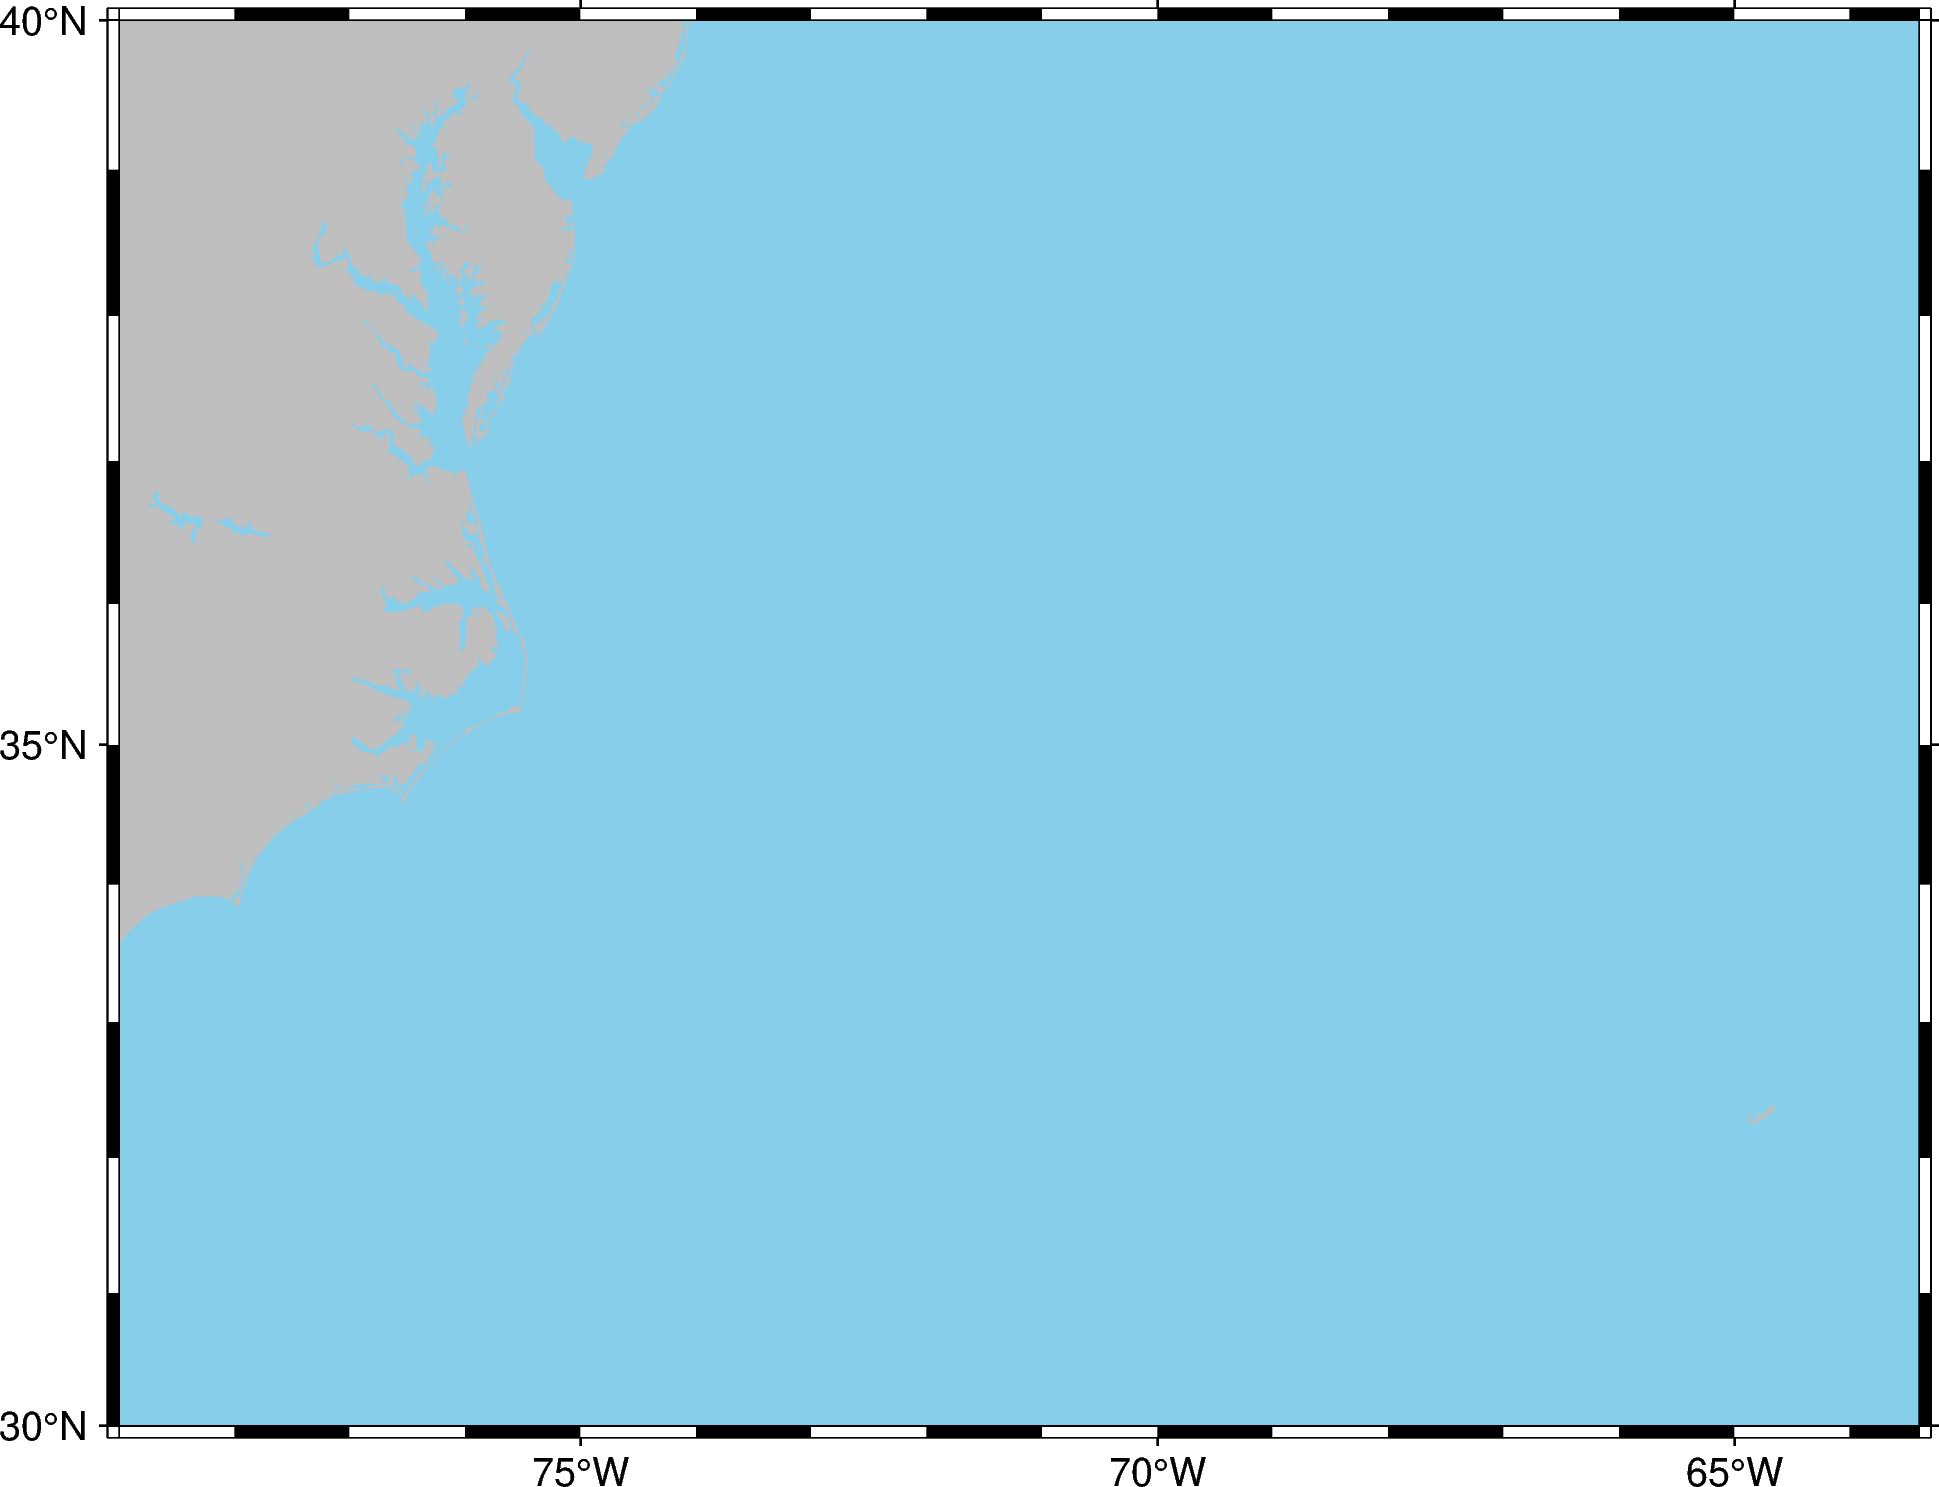

In [50]:
import pygmt

fig = pygmt.Figure()
fig.coast(region=[-79, -63.4, 30, 40], projection="M6i", frame=True, land="grey", water="skyblue")
fig.show()


coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


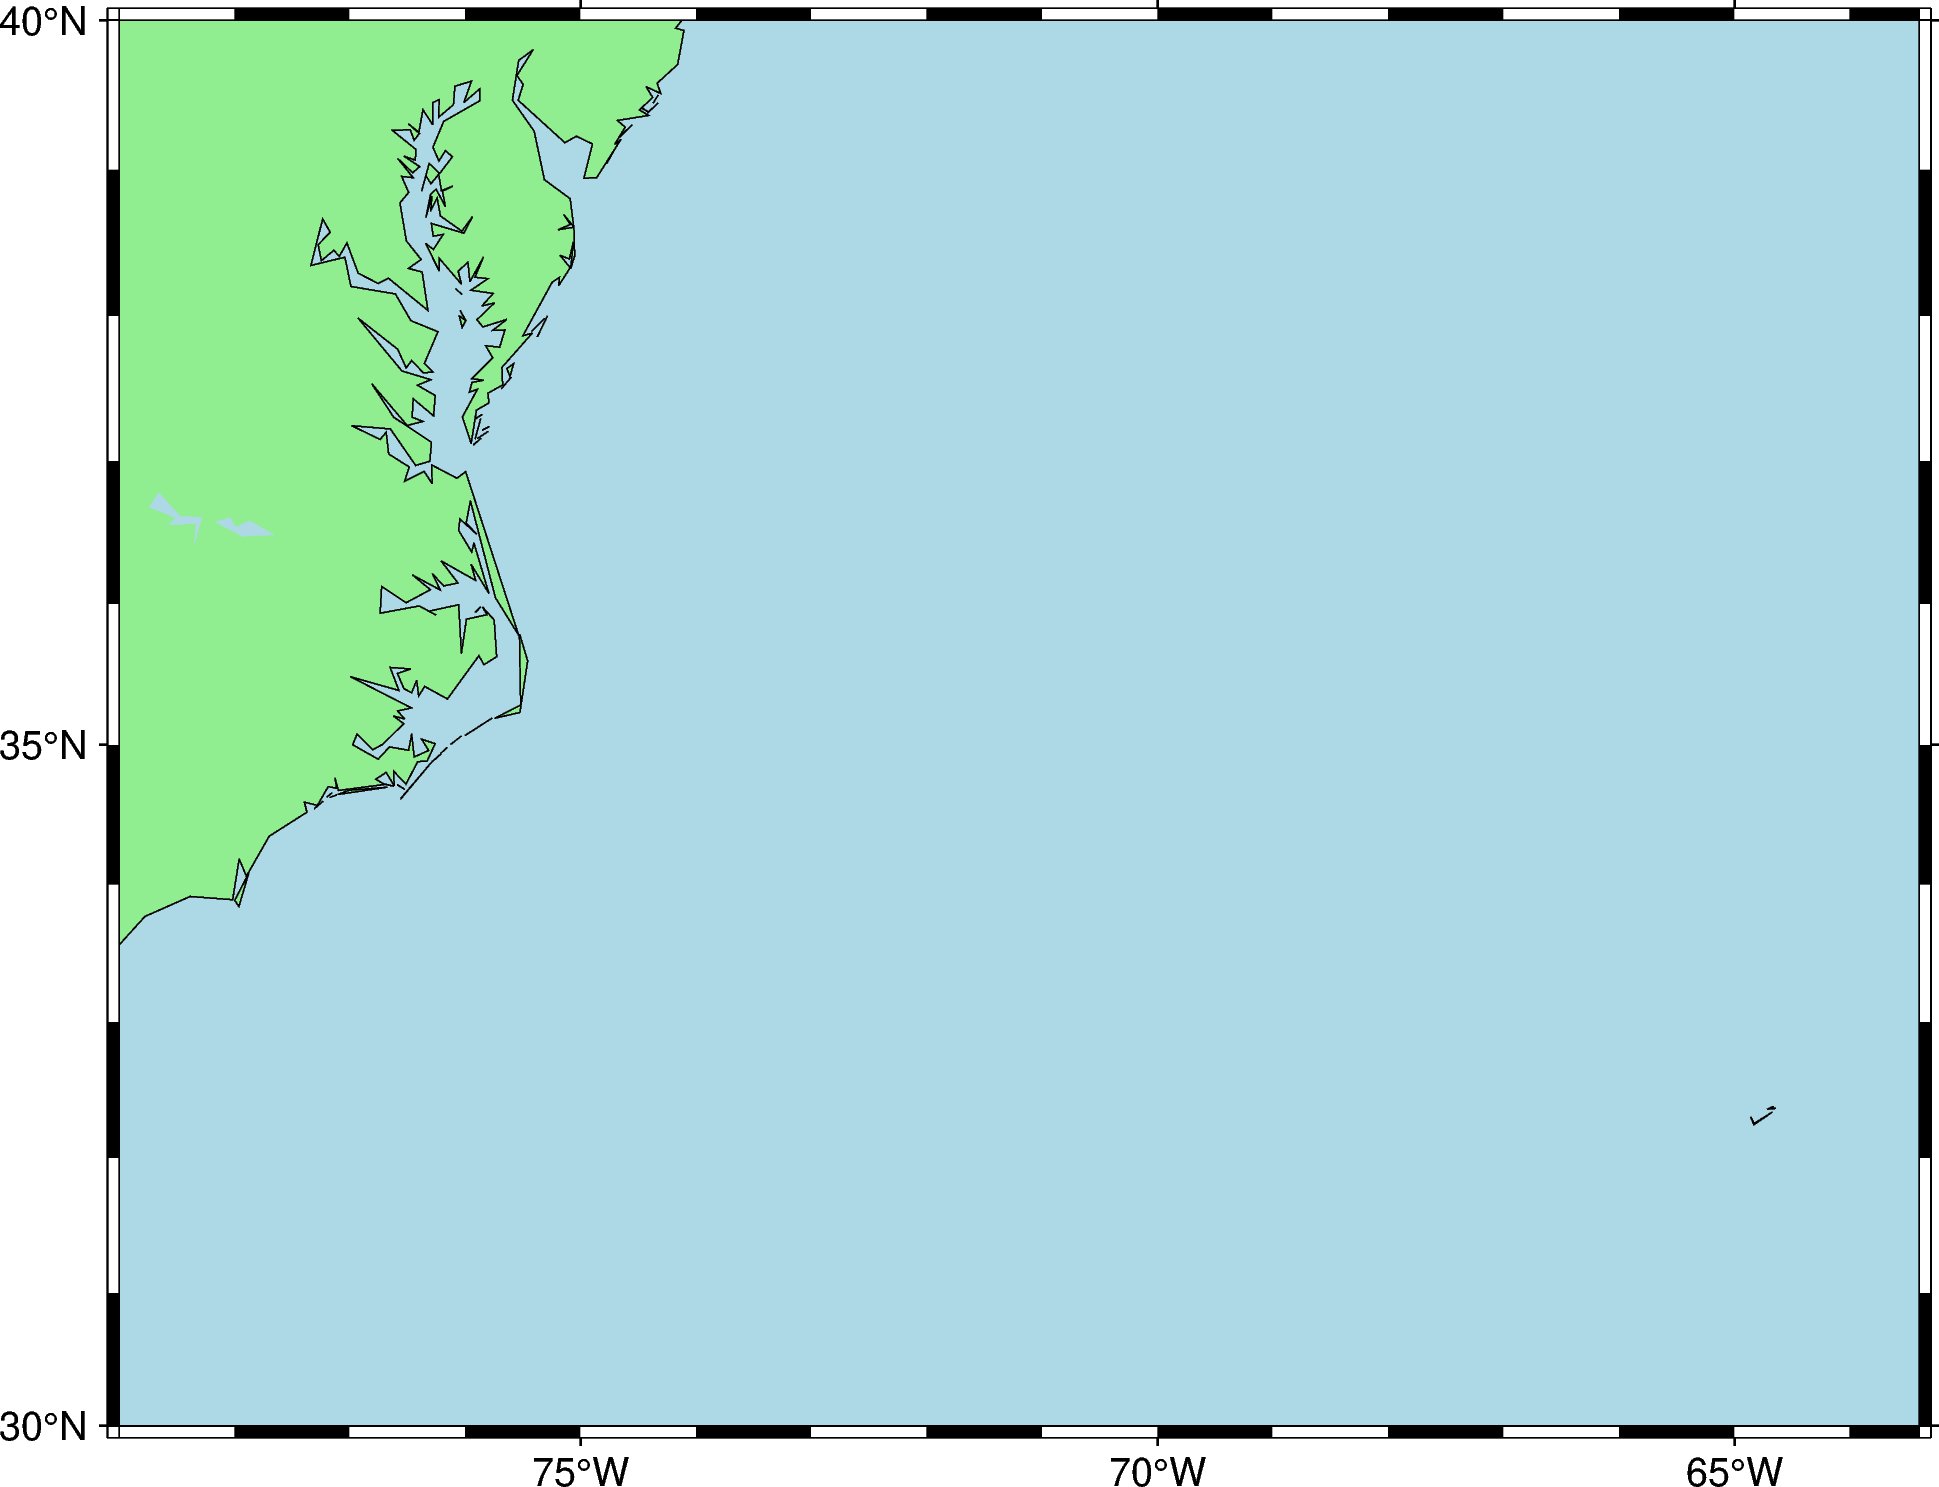

In [54]:
import pygmt

fig = pygmt.Figure()

# Customize the appearance
fig.coast(
    region=[-79, -63.4, 30, 40],
    projection="M6i",
    frame=True,
    land="lightgreen",  # Change land color to light green
    water="lightblue",  # Change water color to light blue
    shorelines="1/0.25p,black",  # Add shorelines with a width of 0.25 points in black color
    resolution="1",  # Set resolution (1 for full resolution)
    rivers="i/0.25p,blue",  # Add rivers with a width of 0.25 points in blue color
    borders="1/0.25p,black",  # Add country borders with a width of 0.25 points in black color
)

fig.show()


coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


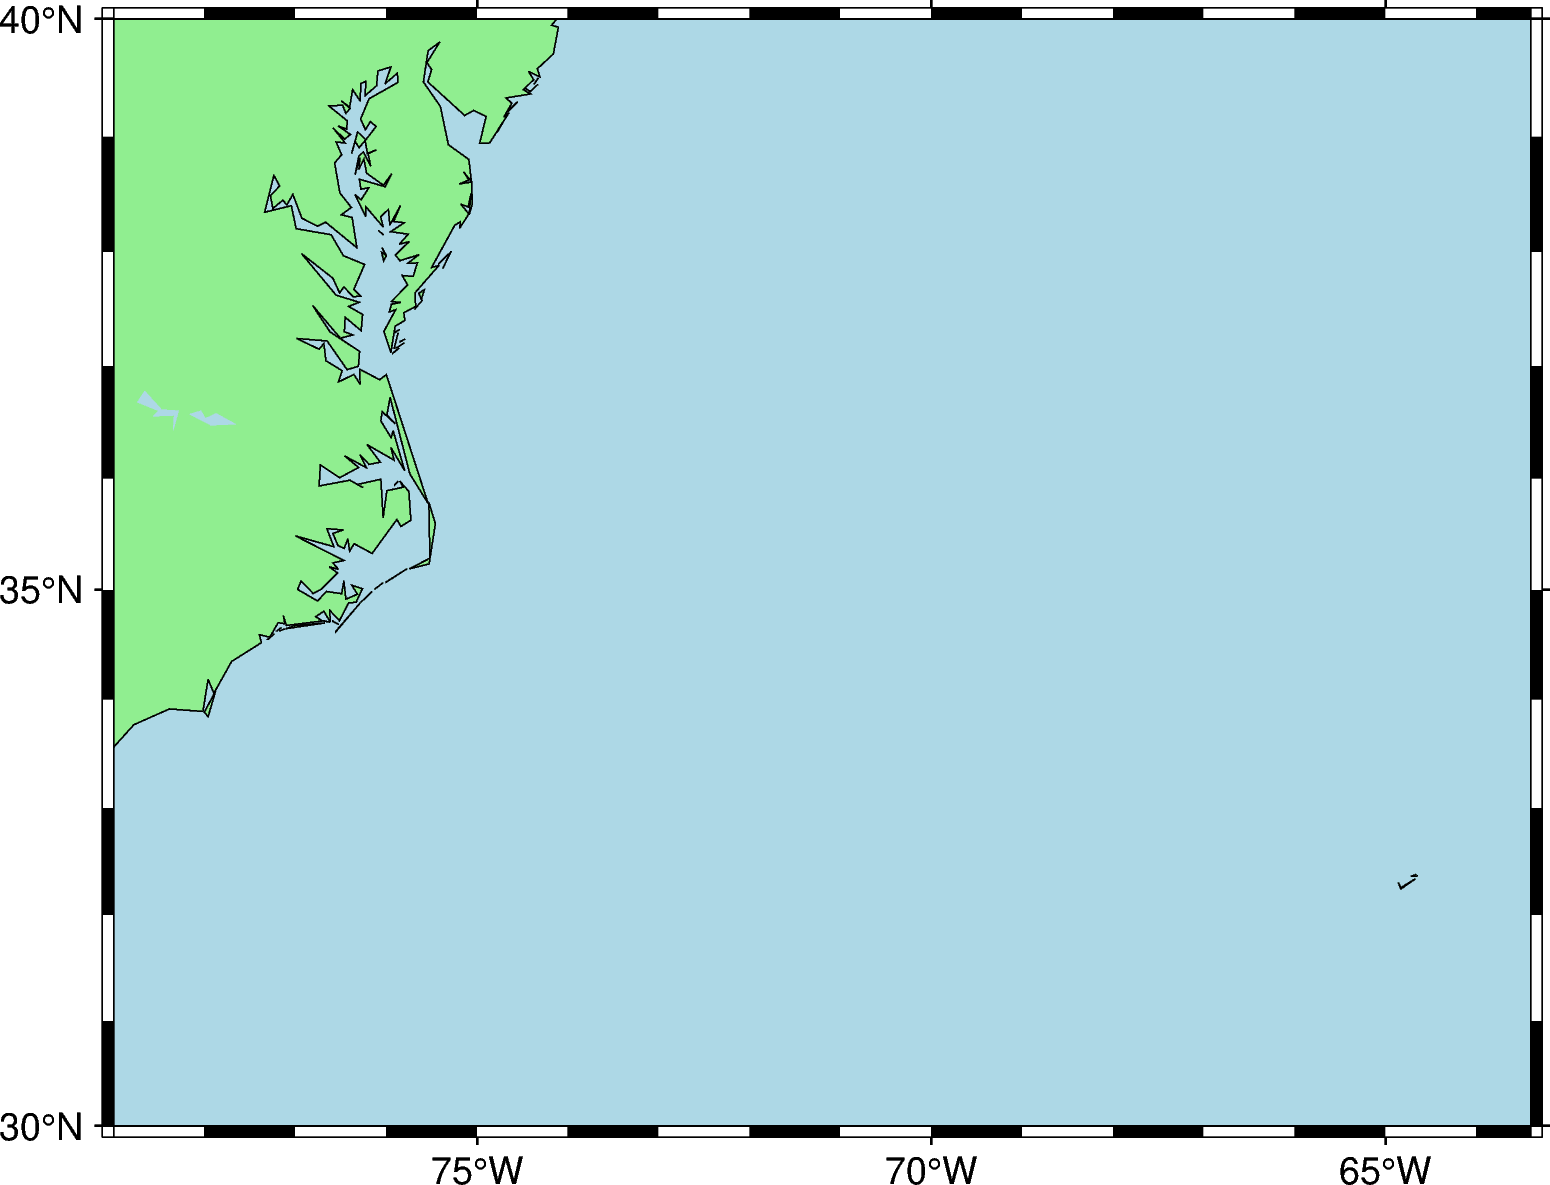

In [61]:
import pygmt

fig = pygmt.Figure()

# Customize the appearance
fig.coast(
    region=[-79, -63.4, 30, 40],
    projection="M12c",
    frame=True,
    land="lightgreen",  # Change land color to light green
    water="lightblue",  # Change water color to light blue
    shorelines="1/0.25p,black",  # Add shorelines with a width of 0.25 points in black color
    resolution="1",  # Set resolution (1 for full resolution)
    rivers="i/0.25p,blue",  # Add rivers with a width of 0.25 points in blue color
    borders="1/0.25p,black",  # Add country borders with a width of 0.25 points in black color
)

fig.show()


coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


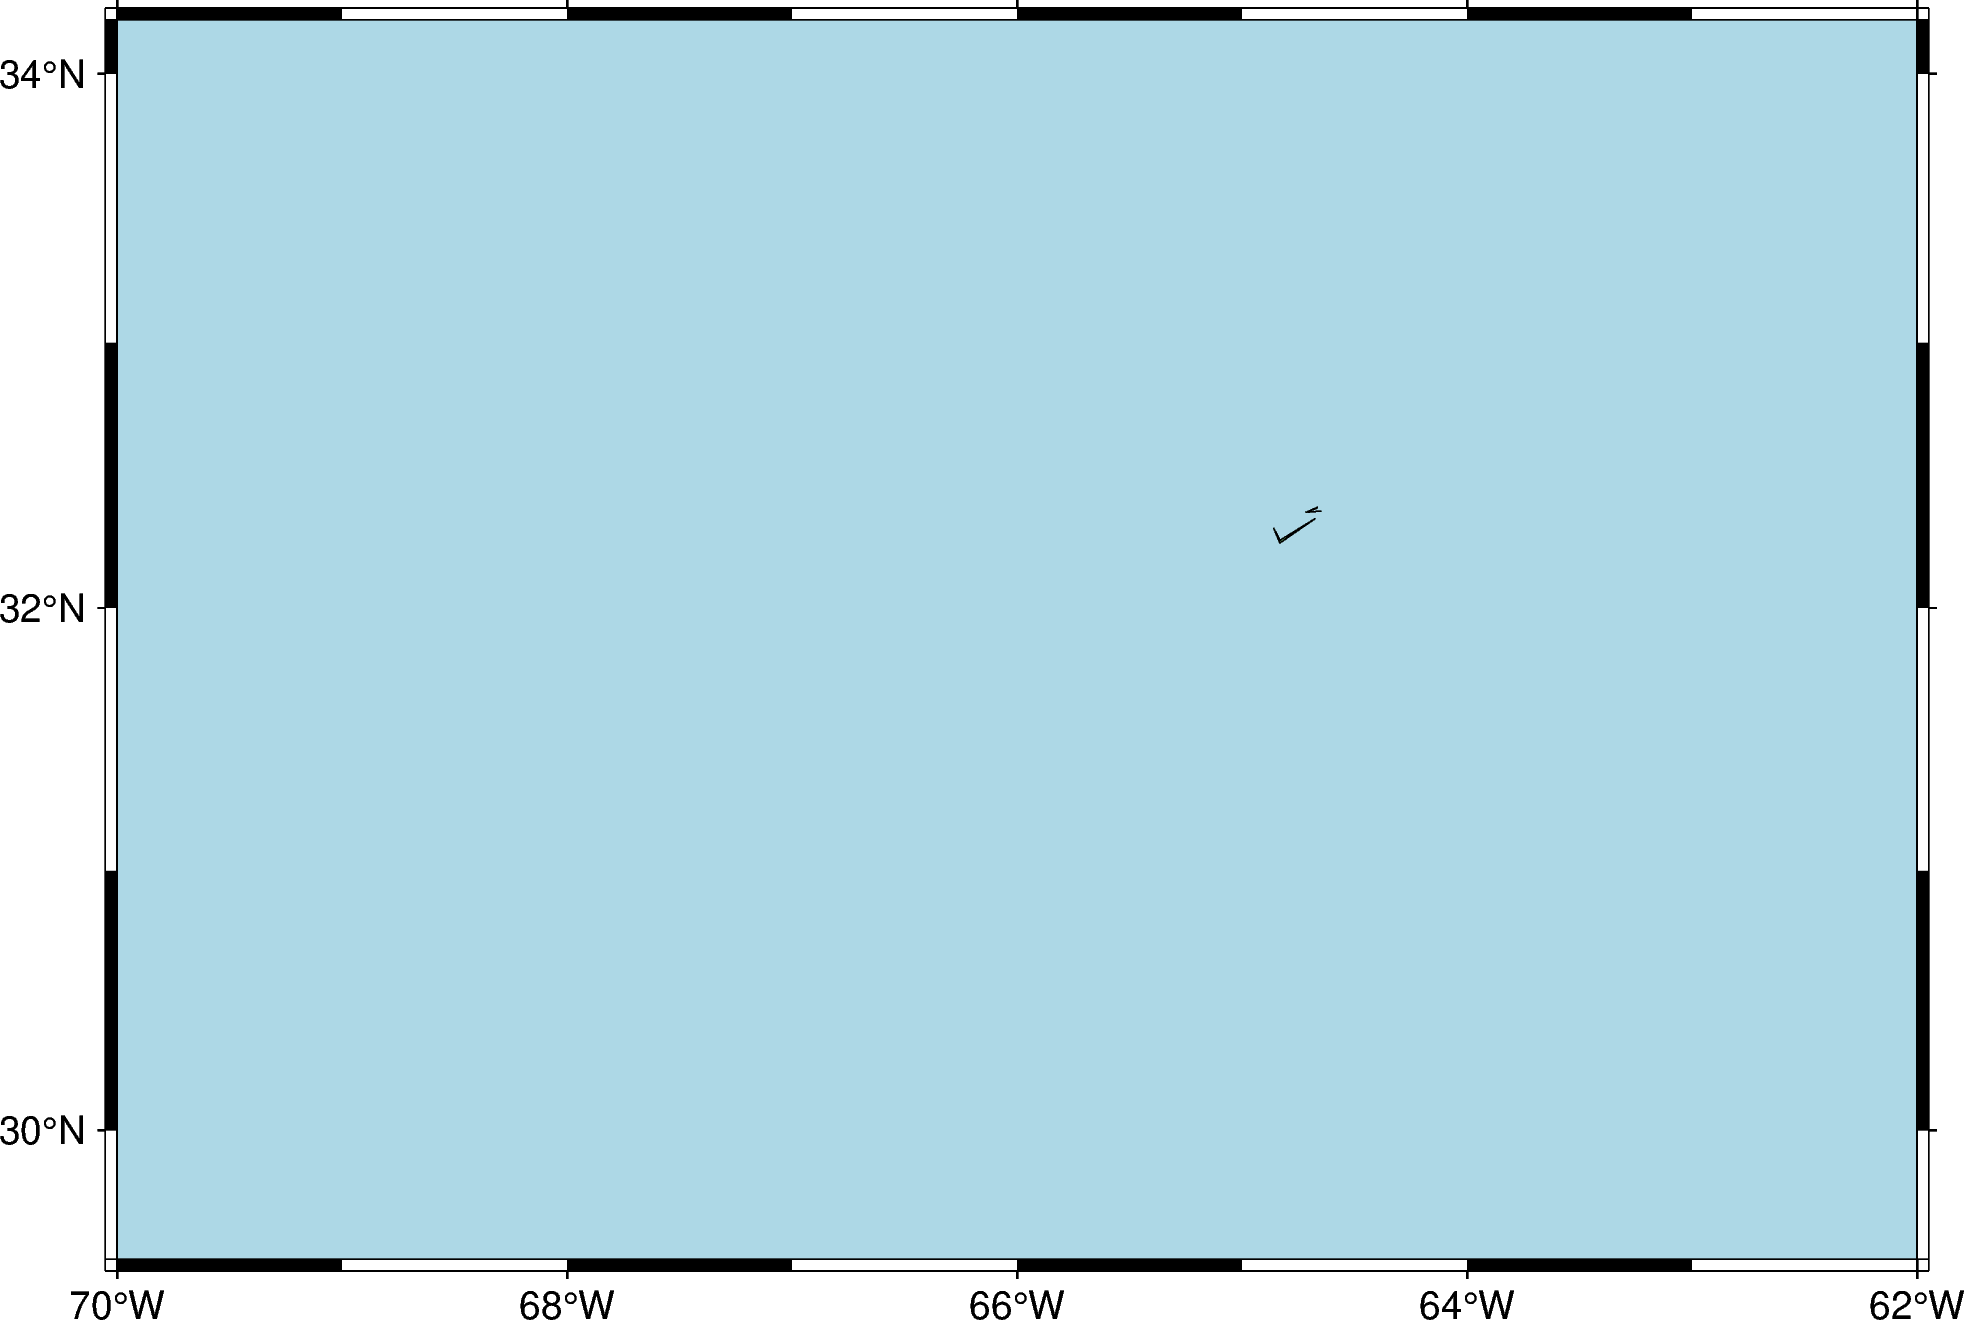

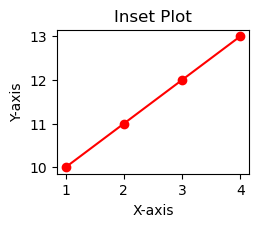

In [66]:
import pygmt
import matplotlib.pyplot as plt

# Create a PyGMT map
fig = pygmt.Figure()

# Customize the appearance of your main map
fig.coast(
    region=[-70, -62, 29.5, 34.2],
    projection="M6i",
    frame=True,
    land="lightgreen",  # Change land color to light green
    water="lightblue",  # Change water color to light blue
    shorelines="1/0.25p,black",  # Add shorelines with a width of 0.25 points in black color
    resolution="1",  # Set resolution (1 for full resolution)
    rivers="i/0.25p,blue",  # Add rivers with a width of 0.25 points in blue color
    borders="1/0.25p,black",  # Add country borders with a width of 0.25 points in black color
)

# Create a Matplotlib inset plot
ax_inset = plt.axes([0.15, 0.15, 0.3, 0.3])  # Adjust position and size as needed

# Customize the appearance of the inset plot (Matplotlib commands)
ax_inset.plot([1, 2, 3, 4], [10, 11, 12, 13], marker='o', color='red')
ax_inset.set_xlabel('X-axis')
ax_inset.set_ylabel('Y-axis')
ax_inset.set_title('Inset Plot')

# Show the PyGMT map
fig.show()

# Show the Matplotlib plot (inset)
plt.show()


In [79]:
import pygmt

# Create the main PyGMT figure for the main map
fig_main = pygmt.Figure()

# Customize the appearance of your main map (set land and water colors to match the background)
fig_main.coast(
    region=[-70, -62, 29.5, 34.2],
    projection="M6i",
    frame=True,
    land="white",  # Set land color to white
    water="white",  # Set water color to white
    resolution="1",  # Set resolution (1 for full resolution)
    borders="1/0.25p,black",  # Add country borders with a width of 0.25 points in black color
)

# Create a separate PyGMT figure for the inset map
fig_inset = pygmt.Figure()

# Overlay the inset map onto the main map using fig.inset()
fig_main.inset(
    fig=fig_inset,  # Use the separate inset figure
    position="jBL+w3i",  # Adjust the position and size of the inset
)

fig_inset.plot(
    region=[-79, -63.4, 30, 40],  # Specify the inset region
    projection="M3i",  # Specify the inset projection
    frame=True,  # Draw frame around the inset
)

fig_main.show()


coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


GMTInvalidInput: No input data provided.

coast [WARNING]: Option -D: Unknown modifier 1 [Defaults to -Dl]


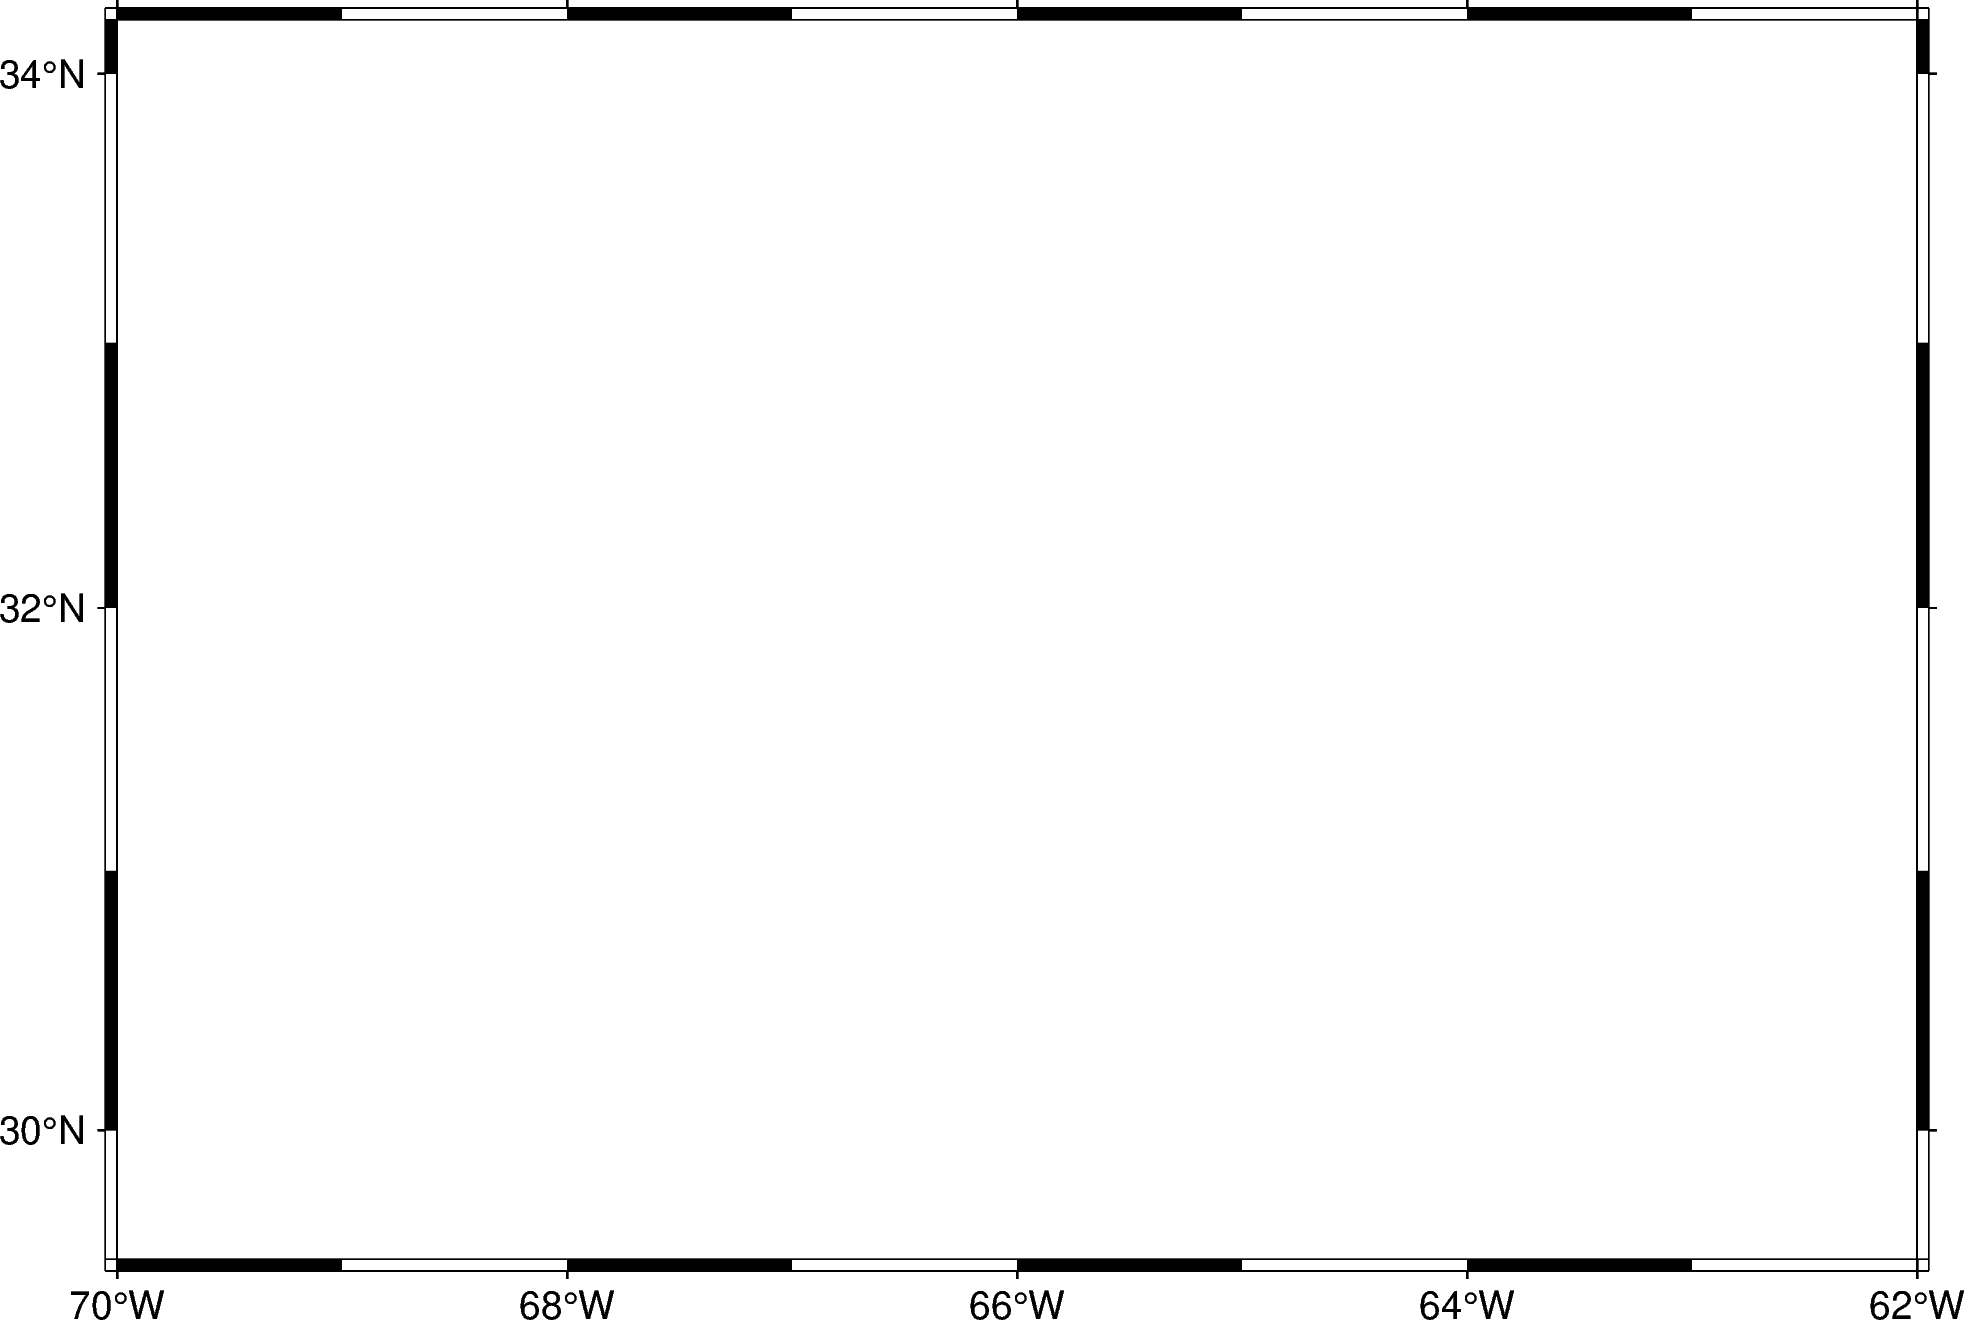

In [80]:
import pygmt

# Create the main PyGMT figure for the main map
fig_main = pygmt.Figure()

# Customize the appearance of your main map (set land and water colors to match the background)
fig_main.coast(
    region=[-70, -62, 29.5, 34.2],
    projection="M6i",
    frame=True,
    land="white",  # Set land color to white
    water="white",  # Set water color to white
    resolution="1",  # Set resolution (1 for full resolution)
    borders="1/0.25p,black",  # Add country borders with a width of 0.25 points in black color
)

# Create a separate PyGMT basemap for the inset map
fig_inset = pygmt.Figure()

# Specify the region and projection for the inset map
fig_inset.basemap(
    region=[-79, -63.4, 30, 40],  # Specify the inset region
    projection="M3i",  # Specify the inset projection
    frame=True,  # Draw frame around the inset
)

# Overlay the inset map onto the main map using fig.inset()
fig_main.inset(
    fig=fig_inset,  # Use the separate inset basemap
    position="jBL+w3i",  # Adjust the position and size of the inset
)

fig_main.show()
